<a href="https://colab.research.google.com/github/stac-bot/Machine_learning_projects/blob/main/ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## start by checking the version


In [24]:
# check the versions of libraries

# python version
import sys
print('python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


## 1. install packages

First, let’s import all of the modules, functions and objects we are going to use in this tutoria

In [25]:
# load libraries 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




## 2. Load Dataset

In [26]:
# We can load the data directly from the UCI Machine Learning repository.
#load dataset

url =  "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width','class']
dataset = read_csv(url,names=names)




## 2. Summarize the Dataset

In [27]:
# Dimension of the dataset
print(dataset.shape)

(150, 5)


In [28]:
#  peek of the dataset
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# statistical Summary
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
# class Distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 3.data visualization

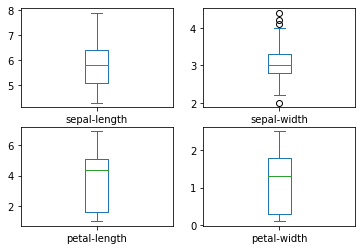

In [31]:
# now we have basix idea of data.
# univariate plots : plot of each individual variable
dataset.plot(kind='box', subplots=True, layout = (2,2),sharex=False, sharey=False)
pyplot.show()

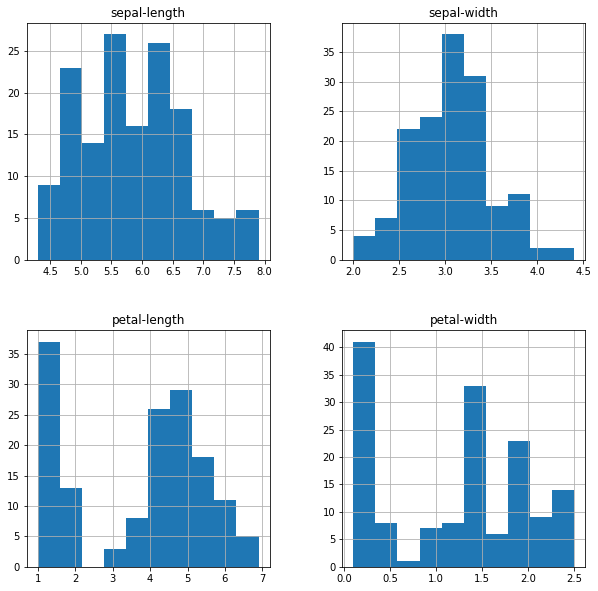

In [32]:
dataset.hist(figsize=(10,10))
pyplot.show()
# we can note the bell curve for the histogram of sepal-length and sepal-width,
# so we can use the algorithm to exploit this assumption

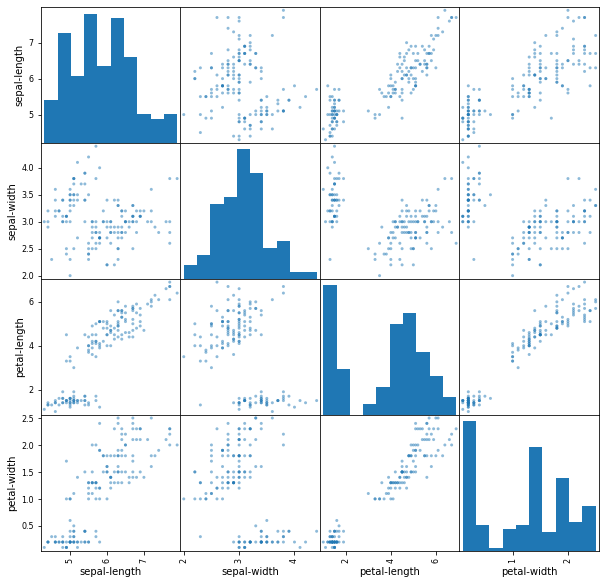

In [33]:
# multivariate plots 
# we can look at the relationship all variables 
# so let's take look at the scatterplots of all attributs.
# how this can help? : to spot structured relationship between input variables

scatter_matrix(dataset, figsize=(10,10))
pyplot.show()

In [34]:
# looking at the grap we can see the diagonal grouping of somer pairs such as between petal-length
# petal-width and petal-width and petal-length 
# this suggest higher correlation and predictable relationship



## 5 Evaluate some algorithms
1. .Separate out a validation dataset.
2.  Set-up the test harness to use 10-fold cross validation.
3.  Build multiple different models to predict species from flower measurements
4.  Select the best model.

In [35]:
# now it is time to create some models of the data and estimate their accuracy on unseen data


Create a validation dataset

In [36]:
#split-out validation dataset
dataset.head().values


array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [37]:
data = dataset.values
X = data[:,:4]
y = data[:,-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
# now we have the training and testing data in the X_train and Y_train for preparing models and 
# X_validation and Y_validation data that we will not show to the model and test it after the model is trained 


Test Harness


In [39]:
# we will use stratified 10-fold cross validation to estimate model accuracy.
# this will split the data inton 10 parts, train on the 9 and test on 1 and will also repeat for
# all the combinations of train-test splits.

# stratified sampling of data: the data is divided into homogenous subgroups called strata,
# and the right number of instances are sampled from each stratum to guarantee that teh test test is 
# representative of overall population.

# we set the random seed via random_state argument to a fixed number so that each algorithm is evaluated on the same splits 
# of the training dataset

# we are using the metric accuracy to evaluate models
#  we will be using the scoring variable when we run build and evaluate each model next.


Build Models

In [40]:
# since we don't know which algorithms can we use for the problem what configuration to use.
# We get an idea from the plots that some of the classes are partially  linearly  separable in some dimension, so 
# Let's try some algorithms


1.  Logistic Regression (LR)
2.  Linear Discriminant Analysis (LDA)
3.  K-Nearest Neighbors (KNN).
4.  Classification and Regression Trees (CART).
5.  Gaussian Naive Bayes (NB).
6.  Support Vector Machines (SVM

In [41]:
# this is a good mixture of simple linear (LR and LDA), nonlinear(KNN, CART, NB, SVM) algorithms

# let's build and evaluate our models:

#spot Check Algorithm 
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
  cv_results = cross_val_score(model,X= X_train, y=Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)'%(name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Notes :



1.   Logistic Regression


> what is penalty? : Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. This is also known as regularization


2.   what is solver? 
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions


>  



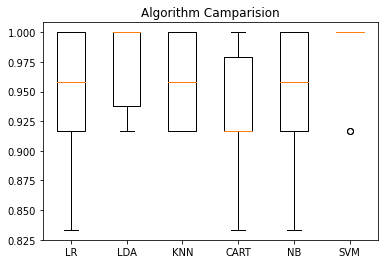

In [42]:
# now let's try to compare the samples of results for each algorithm by using box and whisker plot
# compare algorithms
pyplot.boxplot(results, labels=names, )
pyplot.title('Algorithm Camparision')
pyplot.show()

## 6. Make Predictions

we have to choose the best possible algorithm to make predictions.<br> 
As we can see the SVM algorithm gives the best possible accuracy so we will be using that one.<br> this article might help to understand bit about SVM: 
https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be
<br>
note from article : 
1.   C -> lower c less error ; higher c high error.
2.   Gamma -> gamma ^ high means more curvature; gamma less means less curvature.

3.    everything depends on data ☺



In [43]:
# make prediction using SVM
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_validation)


Evaluate perdictions

In [44]:
# Evaluate predictions
print("accuracy_score: \n", accuracy_score(Y_validation, prediction))
print("confusion_matrix: \n",confusion_matrix(Y_validation, prediction))
print("classification_report: \n",classification_report(Y_validation, prediction))

accuracy_score: 
 0.9666666666666667
confusion_matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
classification_report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## save your model with pickle

pickle is the standard way of serializing objects in python.<br>

Check the article for How to save your models: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/


In [45]:
# save the model to disk
import pickle
filename = 'iris_prediction_mod.sav'
pickle.dump(model,open(filename,'wb') )

Load the model from disk

In [48]:
# load model from disk
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_validation,Y_validation)
print("model_acccuracy: ",result)

model_acccuracy:  0.9666666666666667
